<a href="https://colab.research.google.com/github/AhmedGwely/Deep-Neural-Network-using-Keras-for-Fashion-MNIST/blob/main/predict_numbers_with_convolution_neural_network_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPool2D
from keras import backend as k

In [ ]:
batch_size = 128
num_classes = 10
epochs = 12

In [ ]:
img_row , img_column = 28,28
(train_imgs, train_labels),(test_imgs,test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_imgs.shape,train_labels.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(test_imgs.shape,test_labels.shape)

(10000, 28, 28) (10000,)


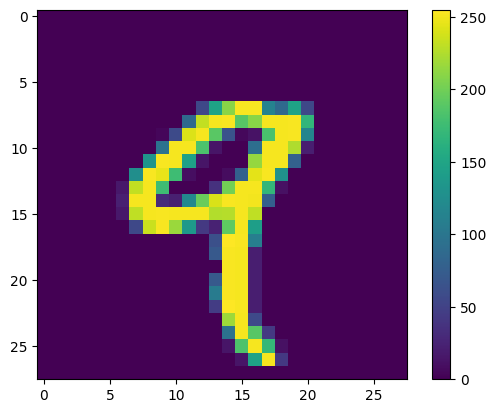

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_imgs[4])
plt.colorbar()

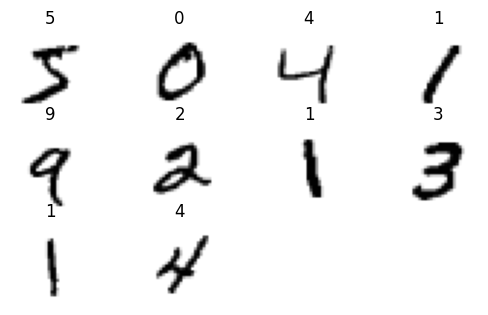

In [ ]:
for i in range(10):
  plt.subplot(4,4,i+1)
  plt.imshow(train_imgs[i],cmap = plt.cm.binary)
  plt.axis('off')
  plt.title(train_labels[i])  # Add title to each subplot


In [ ]:
# Reshape images to have a single channel
if k.image_data_format() == 'channels_first':
  train_imgs = train_imgs.reshape(train_imgs.shape[0],img_row,img_column,1)
  test_imgs = test_imgs.reshape(test_imgs.shape[0],img_row,img_column,1)
  input_shape = (img_row,img_column,1)
else:
  train_imgs = train_imgs.reshape(train_imgs.shape[0],img_row,img_column,1)
  test_imgs = test_imgs.reshape(test_imgs.shape[0],img_row,img_column,1)
  input_shape = (img_row,img_column,1)  # height, width, channels

# Normalize pixel values to the range [0, 1]
train_imgs = train_imgs/255.0
test_imgs = test_imgs/255.0


In [ ]:
print(train_imgs.shape)
print(test_imgs.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#converting classes vector to binary classes matrics
train_labels = keras.utils.to_categorical(train_labels,num_classes)
test_labels = keras.utils.to_categorical(test_labels,num_classes)

print(train_labels.shape,test_labels.shape)


(60000, 10) (10000, 10)


In [ ]:
from sys import flags
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform', input_shape=(28, 28, 1))) # input shape is a variable (1,28,28)
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2))) # take the max num in (2,2) in the pixels
#MaxPool is the last layer in convolution neural network
model.add(Flatten())# make the output from Maxpool layer to one dimention pixels
model.add(Dense (100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes,activation='softmax')) # num_classes = 10 neurons
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 100)               921700    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

In [ ]:
input_shape


(28, 28, 1)

In [ ]:
"""model.compile(optimizer = keras.optimizers.Adadelta(),
              loss = keras.losses.categorical_crossentropy,
              metrics = ['accuracy']
              )"""

"model.compile(optimizer = keras.optimizers.Adadelta(),\n              loss = keras.losses.categorical_crossentropy,\n              metrics = ['accuracy']\n              )"

In [ ]:
opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_imgs,train_labels,
          batch_size=128,
          epochs = 12,
          verbose=1,
          validation_data = (test_imgs,test_labels))

Epoch 1/12
469/469 [==============================] - 8s 9ms/step - loss: 0.2181 - accuracy: 0.9336 - val_loss: 0.0897 - val_accuracy: 0.9728
Epoch 2/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0630 - accuracy: 0.9811 - val_loss: 0.0514 - val_accuracy: 0.9835
Epoch 3/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0431 - accuracy: 0.9873 - val_loss: 0.0447 - val_accuracy: 0.9860
Epoch 4/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0321 - accuracy: 0.9900 - val_loss: 0.0484 - val_accuracy: 0.9845
Epoch 5/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0250 - accuracy: 0.9923 - val_loss: 0.0329 - val_accuracy: 0.9888
Epoch 6/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0183 - accuracy: 0.9942 - val_loss: 0.0308 - val_accuracy: 0.9900
Epoch 7/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0158 - accuracy: 0.9952 - val_loss: 0.0376 - val_accuracy: 0.9886
Epoch 

In [ ]:
print("Train images shape:", train_imgs.shape)
print("Train labels shape:", train_labels.shape)


Train images shape: (60000, 28, 28, 1)
Train labels shape: (60000, 10)


In [ ]:
score = model.evaluate(test_imgs,test_labels,verbose=0)
score

[0.038359660655260086, 0.9890999794006348]

In [ ]:
print('score loss', score[0])
print('score accuracy', score[1] * 100)

score loss 0.038359660655260086
score accuracy 98.90999794006348


313/313 [==============================] - 1s 2ms/step
0


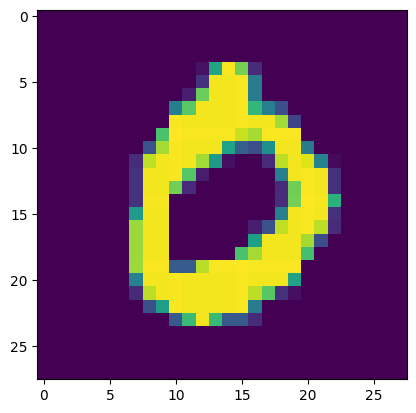

In [ ]:
import numpy as np
predict = model.predict(test_imgs) # returns an array of class probabilities for each image in test_imgs
pre = np.argmax(predict[3])
print(pre)
plt.figure()
plt.imshow(test_imgs[3])

In [ ]:
predict

array([[9.25153237e-14, 7.97119055e-12, 9.93206051e-09, ...,
        1.00000000e+00, 1.40590499e-11, 3.33352479e-09],
       [1.49966899e-12, 1.71479900e-10, 1.00000000e+00, ...,
        1.70792357e-15, 1.63321908e-11, 7.23638797e-15],
       [1.19152880e-07, 9.99886751e-01, 1.84157287e-07, ...,
        2.18185796e-05, 8.20118948e-05, 1.12734186e-08],
       ...,
       [1.00204626e-16, 3.52032416e-14, 5.19442690e-16, ...,
        4.51840822e-11, 5.57314250e-10, 5.66028058e-10],
       [1.69605961e-13, 1.85111343e-15, 9.10509729e-17, ...,
        1.65320665e-13, 1.92336756e-07, 7.18854433e-14],
       [1.72360910e-11, 3.78539448e-15, 4.06737404e-12, ...,
        7.01111153e-19, 1.40587748e-12, 1.17142260e-14]], dtype=float32)

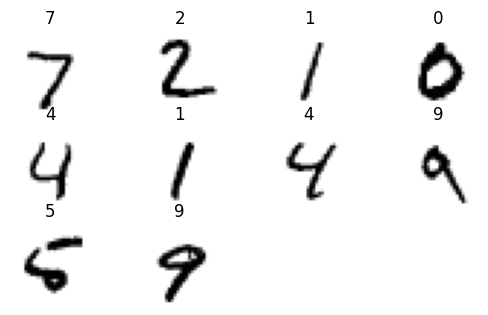

In [ ]:
# predicted values from test sample
for i in range(10):
  plt.subplot(4,4,i+1)
  plt.imshow(test_imgs[i],cmap = plt.cm.binary)
  plt.axis('off')
  plt.title(np.argmax(predict[i]))

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
